In [1]:
# 바닥부터 다시 해보자.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import os
import gc
print(os.listdir("../input/ieee-fraud-detection/"))
pd.options.display.max_rows = 99
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

['train_identity.csv', 'test_identity.csv', 'test_transaction.csv', 'sample_submission.csv', 'train_transaction.csv']


In [3]:
train = pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv', index_col ='TransactionID')
test = pd.read_csv('../input/ieee-fraud-detection/test_transaction.csv', index_col ='TransactionID')
train_id = pd.read_csv('../input/ieee-fraud-detection/train_identity.csv', index_col = 'TransactionID')
test_id = pd.read_csv('../input/ieee-fraud-detection/test_identity.csv', index_col = 'TransactionID')

In [4]:
# column Type을 다시 지정해주자 
#https://www.kaggle.com/mhviraf/reducing-memory-size-an-alternative
# NaN 이 포함된 int value도 float으로 되어 있고, 이를 Reduce mem usuage 사용하면 데이터 손실이 발생하기도 한다.V
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    del_cols = ['TransactionAmt','dist1', 'dist2', 'C1', 'C2', 'C4', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'D8', 'D9', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V150', 'V159', 'V164', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V332', 'V334', 'V335', 'V336']
    
    cols = [x for x in list(df.columns) if x not in del_cols]# 데이터가 변경되는 컬럼은 제외 81개
    for col in tqdm(cols):
#         if col in cols : continue 
        col_type = df[col].dtype
        #print(col_type)
#         if str(col_type)[:4]== 'date' : continue
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [5]:
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)
gc.collect()

  0%|          | 0/312 [00:00<?, ?it/s]

Memory usage of dataframe is 1775.15 MB


  0%|          | 0/311 [00:00<?, ?it/s]

Memory usage after optimization is: 722.57 MB
Decreased by 59.3%
Memory usage of dataframe is 1519.24 MB


100%|██████████| 311/311 [03:07<00:00,  5.53it/s]

Memory usage after optimization is: 619.49 MB
Decreased by 59.2%


0

In [6]:
train_id = reduce_mem_usage(train_id)
test_id = reduce_mem_usage(test_id)

 28%|██▊       | 11/40 [00:00<00:00, 105.46it/s]

Memory usage of dataframe is 45.12 MB


 30%|███       | 12/40 [00:00<00:00, 98.05it/s]

Memory usage after optimization is: 10.57 MB
Decreased by 76.6%
Memory usage of dataframe is 44.39 MB


100%|██████████| 40/40 [00:00<00:00, 82.49it/s]

Memory usage after optimization is: 10.40 MB
Decreased by 76.6%


In [7]:
# Test train_t vs. train
# 80개 컬럼은 데이터가 변경되므로 80개는 Reduce_mem_usuage를 하지 않기로 하자.
# chklst = []
# for col in list(train.columns):
#     tst1 = list(train[col].dropna())
#     tst2 = list(train_t[col].dropna())
#     if tst1 == tst2 : continue
#     else : chklst.append(col)
# print(chklst)

# # 변경된 컬럼 확인 : 
# tst1 = list(train['V336'].dropna())
# tst2 = list(train_t['V336'].dropna())
# for i in range(len(tst1)):
#     #print(tst1[i], tst2[i])
#     if tst1[i] == tst2[i]: continue
#     else :
#         print(tst1[i], tst2[i])

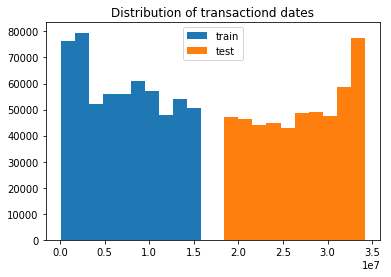

In [8]:
# TransactionDT를 Time으로 전환하기
plt.hist(train['TransactionDT'], label='train');
plt.hist(test['TransactionDT'], label='test');
plt.legend();
plt.title('Distribution of transactiond dates');
plt.show()

import datetime
# Train 데이터: 2월~7월(6개월) , test 데이터 :9월~2월
# 1,2,3월에 transaction이 많다.
# 매달 말일의 fraud 비율이 높다. 25~31일 을 1로 치환하자
startdate= '2017-11-30'
startdate= datetime.datetime.strptime(startdate,'%Y-%M-%d')

train['date']= train['TransactionDT'].map(lambda x : (startdate+datetime.timedelta(seconds=x)))
test['date']= test['TransactionDT'].map(lambda x : (startdate+datetime.timedelta(seconds=x)))

train['dayofyear'] =  train['date'].dt.dayofyear
test['dayofyear'] =  test['date'].dt.dayofyear

train['day'] = train['date'].dt.day
test['day'] = test['date'].dt.day

train['hours'] = train['date'].dt.hour
test['hours'] = test['date'].dt.hour

train['weekdays'] = train['date'].dt.dayofweek
test['weekdays'] = test['date'].dt.dayofweek

train['week'] = train['date'].dt.week
test['week'] = test['date'].dt.week

train['month'] = train['date'].dt.month
test['month'] = test['date'].dt.month


In [9]:
# D8 의 소수점이 D9 - drop
# train['new_D8'] = (train['D8']-train['D9']).fillna(99).astype('int') 
# test['new_D8'] = (test['D8']-test['D9']).fillna(99).astype('int')

In [10]:
# 이걸 넣고 안넣고를 테스트 CV -0.8872 변화 X
# train['day>25'] = np.where(train['day']>25,1,0)
# test['day>25'] = np.where(test['day']>25,1,0)


In [11]:
# transaction columns
# Categorical : ProductCD, card1~card6, addr1~2, dist1~2, P_emaildomain, R_emaildomain, 
# C1~14 , D1~15, M1~9 , V1~339

# Null values
nulls = train.isnull().sum().to_dict()
# Null 갯수로 컬럼을 그룹핑할 수있다. - 이 Grouping으로 컬럼을 만들수 있겠다
    # D8-D9 / M1-M3/ V1-V11 / V12- V34 /V35 -V52 / V53 - V74 / V75 - V94 / V95-137 
    # V138-152 / V153- 158 /V159 - V160 / V161-163 /V164-168 / V169 -V171 / V172 - V173
    # V174-V175,180,184,185,188,189,194,195,197,198,200,201,208,209 /V176~ /V217~278
    # V322~339
nulls

{'isFraud': 0,
 'TransactionDT': 0,
 'TransactionAmt': 0,
 'ProductCD': 0,
 'card1': 0,
 'card2': 8933,
 'card3': 1565,
 'card4': 1577,
 'card5': 4259,
 'card6': 1571,
 'addr1': 65706,
 'addr2': 65706,
 'dist1': 352271,
 'dist2': 552913,
 'P_emaildomain': 94456,
 'R_emaildomain': 453249,
 'C1': 0,
 'C2': 0,
 'C3': 0,
 'C4': 0,
 'C5': 0,
 'C6': 0,
 'C7': 0,
 'C8': 0,
 'C9': 0,
 'C10': 0,
 'C11': 0,
 'C12': 0,
 'C13': 0,
 'C14': 0,
 'D1': 1269,
 'D2': 280797,
 'D3': 262878,
 'D4': 168922,
 'D5': 309841,
 'D6': 517353,
 'D7': 551623,
 'D8': 515614,
 'D9': 515614,
 'D10': 76022,
 'D11': 279287,
 'D12': 525823,
 'D13': 528588,
 'D14': 528353,
 'D15': 89113,
 'M1': 271100,
 'M2': 271100,
 'M3': 271100,
 'M4': 281444,
 'M5': 350482,
 'M6': 169360,
 'M7': 346265,
 'M8': 346252,
 'M9': 346252,
 'V1': 279287,
 'V2': 279287,
 'V3': 279287,
 'V4': 279287,
 'V5': 279287,
 'V6': 279287,
 'V7': 279287,
 'V8': 279287,
 'V9': 279287,
 'V10': 279287,
 'V11': 279287,
 'V12': 76073,
 'V13': 76073,
 'V14':

In [12]:
#PCA
from sklearn.decomposition import PCA


lst = list(['V%i'%i for i in range(1,12)])
cols = ['PCA1_V1_11','PCA2_V1_11','PCA3_V1_11','PCA4_V1_11','PCA5_V1_11']
pca = PCA(n_components=5)
train = pd.concat([train,pd.DataFrame(pca.fit_transform(train.loc[:,lst].fillna(0)), columns=cols, index=train.loc[:,lst].index)],axis=1)
test =  pd.concat([test,pd.DataFrame(pca.fit_transform(test.loc[:,lst].fillna(0)), columns=cols, index=test.loc[:,lst].index)],axis=1)

# lst = ['V%i'%i for i in range(12,35)]
lst = list(['V%i'%i for i in range(12,35)])
cols = ['PCA1_V12_34','PCA2_V12_34','PCA3_V12_34','PCA4_V12_34','PCA5_V12_34']
pca = PCA(n_components=5)
train = pd.concat([train,pd.DataFrame(pca.fit_transform(train.loc[:,lst].fillna(0)), columns=cols, index=train.loc[:,lst].index)],axis=1)
test =  pd.concat([test,pd.DataFrame(pca.fit_transform(test.loc[:,lst].fillna(0)), columns=cols, index=test.loc[:,lst].index)],axis=1)

# lst = ['V%i'%i for i in range(75,95)]
lst = list(['V%i'%i for i in range(75,95)])
cols = ['PCA1_V75_94','PCA2_V75_94','PCA3_V75_94','PCA3_V75_94','PCA3_V75_94']
pca = PCA(n_components=5)
train = pd.concat([train,pd.DataFrame(pca.fit_transform(train.loc[:,lst].fillna(0)), columns=cols, index=train.loc[:,lst].index)],axis=1)
test =  pd.concat([test,pd.DataFrame(pca.fit_transform(test.loc[:,lst].fillna(0)), columns=cols, index=test.loc[:,lst].index)],axis=1)

gc.collect()
# train

3741

In [13]:
train['V1_11'] = ''
test['V1_11'] = ''
for col in ['V%i'%i for i in range(1,12)]:
    train[col] = train[col].fillna(0)
    train['V1_11'] += train[col].astype('int').astype('str')
    
    test[col] = test[col].fillna(0)
    test['V1_11'] += test[col].astype('int').astype('str')
    

# CV 0.0012 Drop # Test
# train['V12_34'] = ''
# test['V12_34'] = ''
# for col in ['V%i'%i for i in range(12,35)]:
#     train[col] = train[col].fillna(0)
#     train['V12_34'] += train[col].astype('int').astype('str')
#     test[col] = test[col].fillna(0)
#     test['V12_34'] += test[col].astype('int').astype('str')



train['V35_52'] = ''
test['V35_52'] = ''
for col in ['V%i'%i for i in range(35,53)]:
    train[col] = train[col].fillna(0)
    train['V35_52'] += train[col].astype('int').astype('str')
    test[col] = test[col].fillna(0)
    test['V35_52'] += test[col].astype('int').astype('str')


train['V75_94'] = ''
test['V75_94'] = ''
for col in ['V%i'%i for i in range(75,95)]:
    train[col] = train[col].fillna(0)
    train['V75_94'] += train[col].astype('int').astype('str')
    test[col] = test[col].fillna(0)
    test['V75_94'] += test[col].astype('int').astype('str')
    


train = train.drop(['V%i'%i for i in range(1,12)]+['V%i'%i for i in range(35,95)], axis =1)
test = test.drop(['V%i'%i for i in range(1,12)]+['V%i'%i for i in range(35,95)], axis =1)

In [14]:
# V95-137 
    # V138-152 / V153- 158 /V159 - V160 / V161-163 /V164-168 / V169 -V171 / V172 - V173
    # V174-V175,180,184,185,188,189,194,195,197,198,200,201,208,209 /V176~ /V217~278
    # V322~339
# train['V95_137'] = ''
# test['V95_137'] = ''
# for col in ['V%i'%i for i in range(95,138)]:
#     train[col] = train[col].fillna(0)
#     train['V95_137'] += train[col].astype('int').astype('str')
#     test[col] = test[col].fillna(0)
#     test['V95_137'] += test[col].astype('int').astype('str')
        
# # CV drop
# # train['V138_152'] = ''
# # test['V138_152'] = ''
# # for col in ['V%i'%i for i in range(139,153)]:
# #     train[col] = train[col].fillna(0)
# #     train['V138_152'] += train[col].astype('int').astype('str')
# #     test[col] = test[col].fillna(0)
# #     test['V138_152'] += test[col].astype('int').astype('str')
        
# train = train.drop(['V%i'%i for i in range(95,138)], axis =1)
# test = test.drop(['V%i'%i for i in range(95,138)], axis =1)

In [15]:
drop_cols = []
#- V126~137(누적 지불액)  / V95~106(누적횟수 조건별) = 평균 지불액
cum_amt = ['V%s'%x for x in range(126,138)]
cum_cnt = ['V%s'%x for x in range(95,107)]
for i in range(len(cum_amt)):
    train['Avg_%s'%cum_amt[i]] = (train[cum_amt[i]]/train[cum_cnt[i]]).fillna(0)
    test['Avg_%s'%cum_amt[i]] = (test[cum_amt[i]]/test[cum_cnt[i]]).fillna(0)
    drop_cols +=[cum_amt[i],cum_cnt[i]]

# # V202~V216 / (V167~V182, V176빼고) = 평균 지불액
# cum_amt = ['V%s'%x for x in range(202,217)]
# cum_cnt = ['V%s'%x for x in range(167,183) if x != 176]
# for i in range(len(cum_amt)):
#     train['Avg_%s'%cum_amt[i]] = (train[cum_amt[i]]/train[cum_cnt[i]]).fillna(0)
#     test['Avg_%s'%cum_amt[i]] = (test[cum_amt[i]]/test[cum_cnt[i]]).fillna(0)
#     drop_cols +=[cum_amt[i],cum_cnt[i]]    
    
# # V263~268 / V217~V222 = 평균 지불액
# cum_amt = ['V%s'%x for x in range(263,269)]
# cum_cnt = ['V%s'%x for x in range(217,223)]
# for i in range(len(cum_amt)):
#     train['Avg_%s'%cum_amt[i]] = (train[cum_amt[i]]/train[cum_cnt[i]]).fillna(0)
#     test['Avg_%s'%cum_amt[i]] = (test[cum_amt[i]]/test[cum_cnt[i]]).fillna(0)
#     drop_cols +=[cum_amt[i],cum_cnt[i]]   
    

# V306/307/308/316/317/318 / V293/294/295
cum_amt = ['V306','V307','V308','V316','V317','V318']
cum_cnt = ['V293','V294','V295','V293','V294','V295']
for i in range(len(cum_amt)):
    train['Avg_%s'%cum_amt[i]] = (train[cum_amt[i]]/train[cum_cnt[i]]).fillna(0)
    test['Avg_%s'%cum_amt[i]] = (test[cum_amt[i]]/test[cum_cnt[i]]).fillna(0)
#     drop_cols +=[cum_amt[i],cum_cnt[i]]  # 누적 횟수/ 누적 거래액을 사용한다 삭제 하지 않고

print(len(drop_cols))
train =train.drop(drop_cols, axis =1)
test = test.drop(drop_cols, axis =1)

24


In [16]:
# # Last Transaction Date -- drop
# train['last_date'] = train['date']-  train['D3'].apply(lambda x: pd.Timedelta(x, unit='D'))
# train['last_dayofyear'] =train['last_date'].dt.dayofyear
# train['last_day'] =train['last_date'].dt.day
# train['last_day'] =train['last_date'].dt.week

# test['last_date'] = test['date']-  test['D3'].apply(lambda x: pd.Timedelta(x, unit='D'))
# test['last_dayofyear'] =test['last_date'].dt.dayofyear
# test['last_day'] =test['last_date'].dt.day
# test['last_day'] =test['last_date'].dt.week

# train= train.drop(['last_date'],axis =1)
# test= test.drop(['last_date'],axis =1)

In [17]:
train['M1_9'] = ''
test['M1_9'] = ''
for x in ['M%s'%i for i in range(1,10) if i !=4]:    
    train[x]=train[x].cat.add_categories("N").fillna('N')
    train['M1_9'] += train[x].astype('str')
    test[x]=test[x].cat.add_categories("N").fillna('N')
    test['M1_9'] += test[x].astype('str')

# train= train.drop(['M%s'%i for i in range(1,10) if i !=4], axis =1)
# test= test.drop(['M%s'%i for i in range(1,10) if i !=4], axis =1)

In [18]:
train['P_emaildomain'].cat.add_categories("NaN").fillna("NaN")
train['R_emaildomain'].cat.add_categories("NaN").fillna("NaN")

test['P_emaildomain'].cat.add_categories("NaN").fillna("NaN")
test['R_emaildomain'].cat.add_categories("NaN").fillna("NaN")

# cardid 생성
train['uid1'] = train['card1'].astype('str')+'-'+train['card2'].astype('str')
train['uid2'] = train['uid1'].astype('str')+'-'+train['card3'].astype('str')
train['uid3'] = train['uid2'].astype('str')+'-'+train['card4'].astype('str')
train['uid4'] = train['uid3'].astype('str')+'-'+train['card5'].astype('str')
train['uid6'] = train['uid4'].astype('str')+'-'+train['card6'].astype('str')
train['uid7'] = train['uid6'].astype('str')+'-'+train['addr1'].astype('str')
train['uid8'] = train['uid7'].astype('str')+'-'+train['addr2'].astype('str')
train['uid9'] = train['uid8'].astype('str')+'-'+train['P_emaildomain'].astype('str')
train['uid10'] = train['uid9'].astype('str')+'-'+train['R_emaildomain'].astype('str')

test['uid1'] = test['card1'].astype('str')+'-'+test['card2'].astype('str')
test['uid2'] = test['uid1'].astype('str')+'-'+test['card3'].astype('str')
test['uid3'] = test['uid2'].astype('str')+'-'+test['card4'].astype('str')
test['uid4'] = test['uid3'].astype('str')+'-'+test['card5'].astype('str')
test['uid6'] = test['uid4'].astype('str')+'-'+test['card6'].astype('str')
test['uid7'] = test['uid6'].astype('str')+'-'+test['addr1'].astype('str')
test['uid8'] = test['uid7'].astype('str')+'-'+test['addr2'].astype('str')
test['uid9'] = test['uid8'].astype('str')+'-'+test['P_emaildomain'].astype('str')
test['uid10'] = test['uid9'].astype('str')+'-'+test['R_emaildomain'].astype('str')
# 삭제 전후 차이 없음??? -- 차이가 크다
# train = train.drop(['card2','card3','card4','card5','card6'], axis =1)
# test = test.drop(['card2','card3','card4','card5','card6'], axis =1)

train['card1_addr1'] = train['card1'].astype('str')+'-'+train['addr1'].astype('str')
test['card1_addr1'] = test['card1'].astype('str')+'-'+test['addr1'].astype('str')

In [19]:
# # Count encoding for card1 feature. 
# # Explained in this kernel: https://www.kaggle.com/nroman/eda-for-cis-fraud-detection
# Drop
# train['card1_count_full'] = train['card1'].map(pd.concat([train['card1'], test['card1']], ignore_index=True).value_counts(dropna=False))
# test['card1_count_full'] = test['card1'].map(pd.concat([train['card1'], test['card1']], ignore_index=True).value_counts(dropna=False))

train['card2_count_full'] = train['card2'].map(pd.concat([train['card2'], test['card2']], ignore_index=True).value_counts(dropna=False))
test['card2_count_full'] = test['card2'].map(pd.concat([train['card2'], test['card2']], ignore_index=True).value_counts(dropna=False))

# Drop
# train['uid1_count_full'] = train['uid1'].map(pd.concat([train['uid1'], test['uid1']], ignore_index=True).value_counts(dropna=False))
# test['uid1_count_full'] = test['uid1'].map(pd.concat([train['uid1'], test['uid1']], ignore_index=True).value_counts(dropna=False))


train['addr1_count_full'] = train['addr1'].map(pd.concat([train['addr1'], test['addr1']], ignore_index=True).value_counts(dropna=False))
test['addr1_count_full'] = test['addr1'].map(pd.concat([train['addr1'], test['addr1']], ignore_index=True).value_counts(dropna=False))

train['uid2_count_full'] = train['uid2'].map(pd.concat([train['uid2'], test['uid2']], ignore_index=True).value_counts(dropna=False))
test['uid2_count_full'] = test['uid2'].map(pd.concat([train['uid2'], test['uid2']], ignore_index=True).value_counts(dropna=False))

train['uid3_count_full'] = train['uid3'].map(pd.concat([train['uid3'], test['uid3']], ignore_index=True).value_counts(dropna=False))
test['uid3_count_full'] = test['uid3'].map(pd.concat([train['uid3'], test['uid3']], ignore_index=True).value_counts(dropna=False))

In [20]:
# train['uid4_count_full'] = train['uid4'].map(pd.concat([train['uid4'], test['uid4']], ignore_index=True).value_counts(dropna=False))
# test['uid4_count_full'] = test['uid4'].map(pd.concat([train['uid4'], test['uid4']], ignore_index=True).value_counts(dropna=False))

# train['uid7_count_full'] = train['uid7'].map(pd.concat([train['uid7'], test['uid7']], ignore_index=True).value_counts(dropna=False))
# test['uid7_count_full'] = test['uid7'].map(pd.concat([train['uid7'], test['uid7']], ignore_index=True).value_counts(dropna=False))

# train['uid9_count_full'] = train['uid9'].map(pd.concat([train['uid9'], test['uid9']], ignore_index=True).value_counts(dropna=False))
# test['uid9_count_full'] = test['uid9'].map(pd.concat([train['uid9'], test['uid9']], ignore_index=True).value_counts(dropna=False))

# train['uid10_count_full'] = train['uid10'].map(pd.concat([train['uid10'], test['uid10']], ignore_index=True).value_counts(dropna=False))
# test['uid10_count_full'] = test['uid10'].map(pd.concat([train['uid10'], test['uid10']], ignore_index=True).value_counts(dropna=False))


In [21]:
# cardid 기준으로 최근 5일간 거래량 통계 # Test All 
# train['uid1'] = train['uid1'].astype('str') 
# train['count_last_uid1'] = train.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).count())
# train['mean_last_uid1'] = train.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
# train['min_last_uid1'] = train.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).min())
# train['max_last_uid1'] = train.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).max())
# train['std_last_uid1'] = train.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())

# test['uid1'] = test['uid1'].astype('str') 
# test['count_last_uid1'] = test.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).count())
# test['mean_last_uid1'] = test.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
# test['min_last_uid1'] = test.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).min())
# test['max_last_uid1'] = test.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).max())
# test['std_last_uid1'] = test.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())

# #최근 10일 평균 대비 큰지 작은지 
# train['trans_mean_last_uid1'] = train['TransactionAmt'] / train.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
# train['trans_std_last_uid1'] = train['TransactionAmt'] / train.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())
# test['trans_mean_last_uid1'] = test['TransactionAmt'] / test.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
# test['trans_std_last_uid1'] = test['TransactionAmt'] / test.groupby('uid1')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())

# # cardid 기준으로 최근 5일간 거래량 통계
# train['uid2'] = train['uid2'].astype('str') 
# train['count_last_uid2'] = train.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).count())
# train['mean_last_uid2'] = train.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
# train['min_last_uid2'] = train.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).min())
# train['max_last_uid2'] = train.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).max())
# train['std_last_uid2'] = train.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())

# test['uid2'] = test['uid2'].astype('str') 
# test['count_last_uid2'] = test.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).count())
# test['mean_last_uid2'] = test.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
# test['min_last_uid2'] = test.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).min())
# test['max_last_uid2'] = test.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).max())
# test['std_last_uid2'] = test.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())

# #최근 10일 평균 대비 큰지 작은지 
# train['trans_mean_last_uid2'] = train['TransactionAmt'] / train.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
# train['trans_std_last_uid2'] = train['TransactionAmt'] / train.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())
# test['trans_mean_last_uid2'] = test['TransactionAmt'] / test.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
# test['trans_std_last_uid2'] = test['TransactionAmt'] / test.groupby('uid2')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())


# # cardid 기준으로 최근 5일간 거래량 통계
# train['uid3'] = train['uid3'].astype('str') 
# train['count_last_uid3'] = train.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).count())
# train['mean_last_uid3'] = train.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
# train['min_last_uid3'] = train.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).min())
# train['max_last_uid3'] = train.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).max())
# train['std_last_uid3'] = train.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())

# test['uid3'] = test['uid3'].astype('str') 
# test['count_last_uid3'] = test.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).count())
# test['mean_last_uid3'] = test.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
# test['min_last_uid3'] = test.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).min())
# test['max_last_uid3'] = test.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).max())
# test['std_last_uid3'] = test.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())

# #최근 10일 평균 대비 큰지 작은지 
# train['trans_mean_last_uid3'] = train['TransactionAmt'] / train.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
# train['trans_std_last_uid3'] = train['TransactionAmt'] / train.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())
# test['trans_mean_last_uid3'] = test['TransactionAmt'] / test.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
# test['trans_std_last_uid3'] = test['TransactionAmt'] / test.groupby('uid3')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())


In [22]:
# cardid 기준으로 최근 5일간 거래량 통계
train['uid4'] = train['uid4'].astype('str') 
train['count_last_uid4'] = train.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).count())
train['mean_last_uid4'] = train.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
train['min_last_uid4'] = train.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).min())
train['max_last_uid4'] = train.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).max())
train['std_last_uid4'] = train.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())

test['uid4'] = test['uid4'].astype('str') 
test['count_last_uid4'] = test.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).count())
test['mean_last_uid4'] = test.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
test['min_last_uid4'] = test.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).min())
test['max_last_uid4'] = test.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).max())
test['std_last_uid4'] = test.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())

#최근 10일 평균 대비 큰지 작은지 
train['trans_mean_last_uid4'] = train['TransactionAmt'] / train.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
train['trans_std_last_uid4'] = train['TransactionAmt'] / train.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())
test['trans_mean_last_uid4'] = test['TransactionAmt'] / test.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
test['trans_std_last_uid4'] = test['TransactionAmt'] / test.groupby('uid4')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())





In [23]:
# cardid 기준으로 최근 5일간 거래량 통계
train['uid10'] = train['uid10'].astype('str') 
train['count_last_uid10'] = train.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).count())
train['mean_last_uid10'] = train.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
train['min_last_uid10'] = train.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).min())
train['max_last_uid10'] = train.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).max())
train['std_last_uid10'] = train.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())

test['uid10'] = test['uid10'].astype('str') 
test['count_last_uid10'] = test.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).count())
test['mean_last_uid10'] = test.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
test['min_last_uid10'] = test.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).min())
test['max_last_uid10'] = test.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).max())
test['std_last_uid10'] = test.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())

#최근 10일 평균 대비 큰지 작은지 
train['trans_mean_last_uid10'] = train['TransactionAmt'] / train.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
train['trans_std_last_uid10'] = train['TransactionAmt'] / train.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())
test['trans_mean_last_uid10'] = test['TransactionAmt'] / test.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).mean())
test['trans_std_last_uid10'] = test['TransactionAmt'] / test.groupby('uid10')['TransactionAmt'].transform(lambda x: x.rolling(5, 1).std())





In [24]:
# # ProductCD 최빈값  -- 떨어진다.
# train['mostproduct'] = train.groupby('uid4')['ProductCD'].transform(lambda x: x.mode()[0])
# train['mostproduct'] = (train['mostproduct']==train['ProductCD']).map({True:1,False:0})

# train['card1'].value_counts()[:100]


In [25]:
# train.s

In [26]:
# D1==D2 첫 거래일로부터의 시간
# D3는 이전 거래까지의 일수  : D1>=D3이어야한다.
# D1==0 이면 D3도 0이어야한다.
#train_slice['DaysFromStart'] = np.round(train_slice['TransactionDT']/(60*60*24),0)
#  train_slice['DaysFromPreviousTransaction'] = train_slice['DaysFromStart'].diff()??
# D1==0 이면 1 아니면 0 : New Transaction


#train['D2']= train['D2'].fillna(train['D1']) ## 리스크있다.
# D1 ==0 -> D2== 0
train['D2'].iloc[np.where(train['D1']==0)] = 0
train['D3'].iloc[np.where(train['D1']==0)] = 0





In [27]:
# train[train['D1']>=train['D3']]['isFraud'].mean()

In [28]:
# for x in range(len(list(train['D1']))):
#     if list(train['D1'])[x]!= list(train['D2'])[x] :
#         print(list(train.index)[x],list(train['isFraud'])[x],list(train['D1'])[x] , list(train['D2'])[x])

In [29]:
# train.loc[2987045,:]#['date']

In [30]:
train.head().T

TransactionID,2987000,2987001,2987002,2987003,2987004
isFraud,0,0,0,0,0
TransactionDT,86400,86401,86469,86499,86506
TransactionAmt,68.5,29,59,50,50
ProductCD,W,W,W,W,H
card1,13926,2755,4663,18132,4497
card2,NaN,404,490,567,514
card3,150,150,150,150,150
card4,discover,mastercard,visa,mastercard,mastercard
card5,142,102,166,117,102
card6,credit,credit,debit,debit,credit


In [31]:
# tst = train[train['month']==2]
# tst['uid4'].value_counts()[:10]

In [32]:
# card Merge

# train[train['card1']== 9515]['card'].value_counts()
# card1~card4까지 같으면 같은 Card


In [33]:
train = pd.merge(train, train_id, on='TransactionID', how='left')
test = pd.merge(test, test_id, on='TransactionID', how='left')
# for x in list(set(train2['month'])):
#     train2[train2['month']==x].to_csv('train_id_%s.csv'%x)
# del train2
# gc.collect()

In [34]:
# identity 테이블 EDA
drop_cols= []
#.1. id_03+04 /5,6 /7,8
train['id_03_04'] =train['id_03'].fillna("N").astype('str')+'_'+train['id_04'].fillna("N").astype('str')
test['id_03_04'] =test['id_03'].fillna("N").astype('str')+'_'+test['id_04'].fillna("N").astype('str')

train['id_05_06'] =train['id_05'].fillna("N").astype('str')+'_'+train['id_06'].fillna("N").astype('str')
test['id_05_06'] =test['id_05'].fillna("N").astype('str')+'_'+test['id_06'].fillna("N").astype('str')

train['id_07_08'] =train['id_07'].fillna("N").astype('str')+'_'+train['id_07'].fillna("N").astype('str')
test['id_07_08'] =test['id_08'].fillna("N").astype('str')+'_'+test['id_08'].fillna("N").astype('str')

drop_cols+=['id_03','id_04','id_05','id_06','id_07','id_08']


# id35~38 묶고 기존 삭제
train['id_35_38'] = ''
test['id_35_38'] = ''
for x in ['id_%s'%i for i in range(35,39)]:    
    train[x]=train[x].cat.add_categories("N").fillna('N')
    train['id_35_38'] += train[x].astype('str')
    test[x]=test[x].cat.add_categories("N").fillna('N')
    test['id_35_38'] += test[x].astype('str')
drop_cols +=['id_%s'%i for i in range(35,39)]

# drop_cols
# id17, 19, 20  : IP 1
train['id_17_20_ip1'] = ''
test['id_17_20_ip1'] = ''
for x in ['id_17','id_19','id_20']:    
    train['id_17_20_ip1'] += "_"+train[x].fillna("N").astype('str')
    test['id_17_20_ip1'] += "_"+test[x].fillna("N").astype('str')
drop_cols += ['id_17','id_19','id_20']

# id21,22  : IP 2
train['id_21_22_ip2'] = ''
test['id_21_22_ip2'] = ''
for x in ['id_21','id_22']:    
    train['id_21_22_ip2'] += "_"+train[x].fillna("N").astype('str')
    test['id_21_22_ip2'] += "_"+test[x].fillna("N").astype('str')
drop_cols += ['id_21','id_22']


# id24,25,26  : IP 3
train['id_24_26_ip3'] = ''
test['id_24_26_ip3'] = ''
for x in ['id_24','id_25','id_26']:    
    train['id_24_26_ip3'] += "_"+train[x].fillna("N").astype('str')
    test['id_24_26_ip3'] += "_"+test[x].fillna("N").astype('str')
drop_cols += ['id_24','id_25','id_26']

# drop_cols
# train= train.drop(drop_cols,axis=1)
# test= test.drop(drop_cols,axis=1)

In [35]:
# train['card2_count_full'] = train['card2'].map(pd.concat([train['card2'], test['card2']], ignore_index=True).value_counts(dropna=False))
# test['card2_count_full'] = test['card2'].map(pd.concat([train['card2'], test['card2']], ignore_index=True).value_counts(dropna=False))

# uid4에 대해 'productcd',id_31',id_33, devicetype, deviceinfo,id_17_20_ip1','id_21_22_ip2','id_24_26_ip3' fqenc
#uid4-id31
train['uid4_id_31_cnts'] = train['uid4'].astype('str')+'_'+train['id_31'].astype('str')
test['uid4_id_31_cnts'] = test['uid4'].astype('str')+'_'+test['id_31'].astype('str')
train['uid4_id_31_cnts'] =train['uid4_id_31_cnts'].map(pd.concat([train.loc[:,['uid4_id_31_cnts']],test.loc[:,['uid4_id_31_cnts']]])['uid4_id_31_cnts'].value_counts())
test['uid4_id_31_cnts'] =test['uid4_id_31_cnts'].map(pd.concat([train.loc[:,['uid4_id_31_cnts']],test.loc[:,['uid4_id_31_cnts']]])['uid4_id_31_cnts'].value_counts())

# # #uid4-id33  # Test
# train['uid4_id_33_cnts'] = train['uid4'].astype('str')+'_'+train['id_33'].astype('str')
# test['uid4_id_33_cnts'] = test['uid4'].astype('str')+'_'+test['id_33'].astype('str')
# train['uid4_id_33_cnts'] =train['uid4_id_33_cnts'].map(pd.concat([train.loc[:,['uid4_id_33_cnts']],test.loc[:,['uid4_id_33_cnts']]])['uid4_id_33_cnts'].value_counts())
# test['uid4_id_33_cnts'] =test['uid4_id_33_cnts'].map(pd.concat([train.loc[:,['uid4_id_33_cnts']],test.loc[:,['uid4_id_33_cnts']]])['uid4_id_33_cnts'].value_counts())

#uid4-DeviceType
train['uid4_DeviceType_cnts'] = train['uid4'].astype('str')+'_'+train['DeviceType'].astype('str')
test['uid4_DeviceType_cnts'] = test['uid4'].astype('str')+'_'+test['DeviceType'].astype('str')
train['uid4_DeviceType_cnts'] =train['uid4_DeviceType_cnts'].map(pd.concat([train.loc[:,['uid4_DeviceType_cnts']],test.loc[:,['uid4_DeviceType_cnts']]])['uid4_DeviceType_cnts'].value_counts())
test['uid4_DeviceType_cnts'] =test['uid4_DeviceType_cnts'].map(pd.concat([train.loc[:,['uid4_DeviceType_cnts']],test.loc[:,['uid4_DeviceType_cnts']]])['uid4_DeviceType_cnts'].value_counts())

#uid4-DeviceInfo
train['uid4_DeviceInfo_cnts'] = train['uid4'].astype('str')+'_'+train['DeviceInfo'].astype('str')
test['uid4_DeviceInfo_cnts'] = test['uid4'].astype('str')+'_'+test['DeviceInfo'].astype('str')
train['uid4_DeviceInfo_cnts'] =train['uid4_DeviceInfo_cnts'].map(pd.concat([train.loc[:,['uid4_DeviceInfo_cnts']],test.loc[:,['uid4_DeviceInfo_cnts']]])['uid4_DeviceInfo_cnts'].value_counts())
test['uid4_DeviceInfo_cnts'] =test['uid4_DeviceInfo_cnts'].map(pd.concat([train.loc[:,['uid4_DeviceInfo_cnts']],test.loc[:,['uid4_DeviceInfo_cnts']]])['uid4_DeviceInfo_cnts'].value_counts())

# #uid4-id17-20
# train['uid4_id_17_20_ip1_cnts'] = train['uid4'].astype('str')+'_'+train['id_17_20_ip1'].astype('str')
# test['uid4_id_17_20_ip1_cnts'] = test['uid4'].astype('str')+'_'+test['id_17_20_ip1'].astype('str')
# train['uid4_id_17_20_ip1_cnts'] =train['uid4_id_17_20_ip1_cnts'].map(pd.concat([train.loc[:,['uid4_id_17_20_ip1_cnts']],test.loc[:,['uid4_id_17_20_ip1_cnts']]])['uid4_id_17_20_ip1_cnts'].value_counts())
# test['uid4_id_17_20_ip1_cnts'] =test['uid4_id_17_20_ip1_cnts'].map(pd.concat([train.loc[:,['uid4_id_17_20_ip1_cnts']],test.loc[:,['uid4_id_17_20_ip1_cnts']]])['uid4_id_17_20_ip1_cnts'].value_counts())

# #uid4-ProductCD
# train['uid4_ProductCD_cnts'] = train['uid4'].astype('str')+'_'+train['ProductCD'].astype('str')
# test['uid4_ProductCD_cnts'] = test['uid4'].astype('str')+'_'+test['ProductCD'].astype('str')
# train['uid4_ProductCD_cnts'] =train['uid4_ProductCD_cnts'].map(pd.concat([train.loc[:,['uid4_ProductCD_cnts']],test.loc[:,['uid4_ProductCD_cnts']]])['uid4_ProductCD_cnts'].value_counts())
# test['uid4_ProductCD_cnts'] =test['uid4_ProductCD_cnts'].map(pd.concat([train.loc[:,['uid4_ProductCD_cnts']],test.loc[:,['uid4_ProductCD_cnts']]])['uid4_ProductCD_cnts'].value_counts())




In [36]:
#uid4-P_emaildomain
train['uid4_P_emaildomain_cnts'] = train['uid4'].astype('str')+'_'+train['P_emaildomain'].astype('str')
test['uid4_P_emaildomain_cnts'] = test['uid4'].astype('str')+'_'+test['P_emaildomain'].astype('str')
train['uid4_P_emaildomain_cnts'] =train['uid4_P_emaildomain_cnts'].map(pd.concat([train.loc[:,['uid4_P_emaildomain_cnts']],test.loc[:,['uid4_P_emaildomain_cnts']]])['uid4_P_emaildomain_cnts'].value_counts())
test['uid4_P_emaildomain_cnts'] =test['uid4_P_emaildomain_cnts'].map(pd.concat([train.loc[:,['uid4_P_emaildomain_cnts']],test.loc[:,['uid4_P_emaildomain_cnts']]])['uid4_P_emaildomain_cnts'].value_counts())


#uid4-R_emaildomain
# train['uid4_R_emaildomain_cnts'] = train['uid4'].astype('str')+'_'+train['R_emaildomain'].astype('str')
# test['uid4_R_emaildomain_cnts'] = test['uid4'].astype('str')+'_'+test['R_emaildomain'].astype('str')
# train['uid4_R_emaildomain_cnts'] =train['uid4_R_emaildomain_cnts'].map(pd.concat([train.loc[:,['uid4_R_emaildomain_cnts']],test.loc[:,['uid4_R_emaildomain_cnts']]])['uid4_R_emaildomain_cnts'].value_counts())
# test['uid4_R_emaildomain_cnts'] =test['uid4_R_emaildomain_cnts'].map(pd.concat([train.loc[:,['uid4_R_emaildomain_cnts']],test.loc[:,['uid4_R_emaildomain_cnts']]])['uid4_R_emaildomain_cnts'].value_counts())


In [37]:
# # 추가한것 9/15
# train['uid10_id_31_cnts'] = train['uid10'].astype('str')+'_'+train['id_31'].astype('str')
# test['uid10_id_31_cnts'] = test['uid10'].astype('str')+'_'+test['id_31'].astype('str')
# train['uid10_id_31_cnts'] =train['uid10_id_31_cnts'].map(pd.concat([train.loc[:,['uid10_id_31_cnts']],test.loc[:,['uid10_id_31_cnts']]])['uid10_id_31_cnts'].value_counts())
# test['uid10_id_31_cnts'] =test['uid10_id_31_cnts'].map(pd.concat([train.loc[:,['uid10_id_31_cnts']],test.loc[:,['uid10_id_31_cnts']]])['uid10_id_31_cnts'].value_counts())

# #uid10-DeviceType
# train['uid10_DeviceType_cnts'] = train['uid10'].astype('str')+'_'+train['DeviceType'].astype('str')
# test['uid10_DeviceType_cnts'] = test['uid10'].astype('str')+'_'+test['DeviceType'].astype('str')
# train['uid10_DeviceType_cnts'] =train['uid10_DeviceType_cnts'].map(pd.concat([train.loc[:,['uid10_DeviceType_cnts']],test.loc[:,['uid10_DeviceType_cnts']]])['uid10_DeviceType_cnts'].value_counts())
# test['uid10_DeviceType_cnts'] =test['uid10_DeviceType_cnts'].map(pd.concat([train.loc[:,['uid10_DeviceType_cnts']],test.loc[:,['uid10_DeviceType_cnts']]])['uid10_DeviceType_cnts'].value_counts())

# #uid10-DeviceInfo
# train['uid10_DeviceInfo_cnts'] = train['uid10'].astype('str')+'_'+train['DeviceInfo'].astype('str')
# test['uid10_DeviceInfo_cnts'] = test['uid10'].astype('str')+'_'+test['DeviceInfo'].astype('str')
# train['uid10_DeviceInfo_cnts'] =train['uid10_DeviceInfo_cnts'].map(pd.concat([train.loc[:,['uid10_DeviceInfo_cnts']],test.loc[:,['uid10_DeviceInfo_cnts']]])['uid10_DeviceInfo_cnts'].value_counts())
# test['uid10_DeviceInfo_cnts'] =test['uid10_DeviceInfo_cnts'].map(pd.concat([train.loc[:,['uid10_DeviceInfo_cnts']],test.loc[:,['uid10_DeviceInfo_cnts']]])['uid10_DeviceInfo_cnts'].value_counts())

# # #u
# train['uid10_P_emaildomain_cnts'] = train['uid10'].astype('str')+'_'+train['P_emaildomain'].astype('str')
# test['uid10_P_emaildomain_cnts'] = test['uid10'].astype('str')+'_'+test['P_emaildomain'].astype('str')
# train['uid10_P_emaildomain_cnts'] =train['uid10_P_emaildomain_cnts'].map(pd.concat([train.loc[:,['uid10_P_emaildomain_cnts']],test.loc[:,['uid10_P_emaildomain_cnts']]])['uid10_P_emaildomain_cnts'].value_counts())
# test['uid10_P_emaildomain_cnts'] =test['uid10_P_emaildomain_cnts'].map(pd.concat([train.loc[:,['uid10_P_emaildomain_cnts']],test.loc[:,['uid10_P_emaildomain_cnts']]])['uid10_P_emaildomain_cnts'].value_counts())


In [38]:
# train['uid4_ProductCD_cnts'] = train['uid4'].astype('str')+'_'+train['ProductCD'].astype('str')
# test['uid4_ProductCD_cnts'] = test['uid4'].astype('str')+'_'+test['ProductCD'].astype('str')
# train['uid4_ProductCD_cnts'] =train['uid4_ProductCD_cnts'].map(pd.concat([train.loc[:,['uid4_ProductCD_cnts']],test.loc[:,['uid4_ProductCD_cnts']]])['uid4_ProductCD_cnts'].value_counts())
# test['uid4_ProductCD_cnts'] =test['uid4_ProductCD_cnts'].map(pd.concat([train.loc[:,['uid4_ProductCD_cnts']],test.loc[:,['uid4_ProductCD_cnts']]])['uid4_ProductCD_cnts'].value_counts())

# train['uid7_ProductCD_cnts'] = train['uid7'].astype('str')+'_'+train['ProductCD'].astype('str')
# test['uid7_ProductCD_cnts'] = test['uid7'].astype('str')+'_'+test['ProductCD'].astype('str')
# train['uid7_ProductCD_cnts'] =train['uid7_ProductCD_cnts'].map(pd.concat([train.loc[:,['uid7_ProductCD_cnts']],test.loc[:,['uid7_ProductCD_cnts']]])['uid7_ProductCD_cnts'].value_counts())
# test['uid7_ProductCD_cnts'] =test['uid7_ProductCD_cnts'].map(pd.concat([train.loc[:,['uid7_ProductCD_cnts']],test.loc[:,['uid7_ProductCD_cnts']]])['uid7_ProductCD_cnts'].value_counts())


# train['uid9_ProductCD_cnts'] = train['uid9'].astype('str')+'_'+train['ProductCD'].astype('str')
# test['uid9_ProductCD_cnts'] = test['uid9'].astype('str')+'_'+test['ProductCD'].astype('str')
# train['uid9_ProductCD_cnts'] =train['uid9_ProductCD_cnts'].map(pd.concat([train.loc[:,['uid9_ProductCD_cnts']],test.loc[:,['uid9_ProductCD_cnts']]])['uid9_ProductCD_cnts'].value_counts())
# test['uid9_ProductCD_cnts'] =test['uid9_ProductCD_cnts'].map(pd.concat([train.loc[:,['uid9_ProductCD_cnts']],test.loc[:,['uid9_ProductCD_cnts']]])['uid9_ProductCD_cnts'].value_counts())

# train['uid10_ProductCD_cnts'] = train['uid10'].astype('str')+'_'+train['ProductCD'].astype('str')
# test['uid10_ProductCD_cnts'] = test['uid10'].astype('str')+'_'+test['ProductCD'].astype('str')
# train['uid10_ProductCD_cnts'] =train['uid10_ProductCD_cnts'].map(pd.concat([train.loc[:,['uid10_ProductCD_cnts']],test.loc[:,['uid10_ProductCD_cnts']]])['uid10_ProductCD_cnts'].value_counts())
# test['uid10_ProductCD_cnts'] =test['uid10_ProductCD_cnts'].map(pd.concat([train.loc[:,['uid10_ProductCD_cnts']],test.loc[:,['uid10_ProductCD_cnts']]])['uid10_ProductCD_cnts'].value_counts())


In [39]:
train['TransactionAmt_decimal'] = ((train['TransactionAmt'] - train['TransactionAmt'].astype(int)) * 1000).astype(int)
test['TransactionAmt_decimal'] = ((test['TransactionAmt'] - test['TransactionAmt'].astype(int)) * 1000).astype(int)


In [40]:
# Some arbitrary features interaction
features = [ 'addr1__card1']
# features = features[:7]
print(features)
for feature in features:

    f1, f2 = feature.split('__')
    train[feature] = train[f1].astype(str) + '_' + train[f2].astype(str)
    test[feature] = test[f1].astype(str) + '_' + test[f2].astype(str)



['addr1__card1']


In [41]:
# for feature in ['id_34', 'id_36']:
#         # Count encoded for both train and test
#     train[feature + '_count_full'] = train[feature].map(pd.concat([train[feature], test[feature]], ignore_index=True).value_counts(dropna=False)).astype('float32')
#     test[feature + '_count_full'] = test[feature].map(pd.concat([train[feature], test[feature]], ignore_index=True).value_counts(dropna=False)).astype('float32')

In [42]:
# # Test
# train['id_02_to_mean_uid4'] = train['id_02'] / train.groupby(['uid4'])['id_02'].transform('mean')
# train['id_02_to_std_uid4'] = train['id_02'] / train.groupby(['uid4'])['id_02'].transform('std')
# test['id_02_to_mean_uid4'] = test['id_02'] / test.groupby(['uid4'])['id_02'].transform('mean')
# test['id_02_to_std_uid4'] = test['id_02'] / test.groupby(['uid4'])['id_02'].transform('std')

# train['D15_to_mean_uid4'] = train['D15'] / train.groupby(['uid4'])['D15'].transform('mean')
# train['D15_to_std_uid4'] = train['D15'] / train.groupby(['uid4'])['D15'].transform('std')
# test['D15_to_mean_uid4'] = test['D15'] / test.groupby(['uid4'])['D15'].transform('mean')
# test['D15_to_std_uid4'] = test['D15'] / test.groupby(['uid4'])['D15'].transform('std')


In [43]:
def uid_aggregation(train_df, test_df, main_columns, uids, aggregations):
    for main_column in tqdm(main_columns):  
        for col in uids:
            for agg_type in aggregations:
                new_col_name = col+'_'+main_column+'_'+agg_type
                temp_df = pd.concat([train_df[[col, main_column]], test_df[[col,main_column]]])
                temp_df = temp_df.groupby([col])[main_column].agg([agg_type]).reset_index().rename(
                                                        columns={agg_type: new_col_name})

                temp_df.index = list(temp_df[col])
                temp_df = temp_df[new_col_name].to_dict()   
                
                train_df[new_col_name] = train_df[col].map(temp_df)
                test_df[new_col_name]  = test_df[col].map(temp_df)
            del temp_df
            gc.collect()
    return train_df, test_df

In [44]:
########################### D Columns
# From columns description we know that
# D1-D15: timedelta, such as days between previous transaction, etc.
# 1. I can't imagine normal negative timedelta values (Let's clip Values)
# 2. Normalize (Min-Max, Standard score) All D columns, except D1,D2,D9
# 3. Do some aggregations based on uIDs
# 4. Freaquency encoding
# 5. D1,D2 are clipped by max train_df values (let's scale it)
i_cols = ['D'+str(i) for i in range(1,16)]
i_cols.remove('D7')
#i_cols += ['TransactionAmt'] ## 커널이 죽는다
# i_cols += ['isFraud']
uids = ['uid4','uid10']  #'card1','card2','card3','card5' 추가하면 커널 죽음 #,'uid9','uid7'
aggregations = ['mean','std']

####### uIDs aggregations
train, test = uid_aggregation(train, test, i_cols, uids, aggregations)

100%|██████████| 14/14 [03:27<00:00, 15.70s/it]


In [45]:


# # ########################### C Columns

# i_cols = ['C'+str(i) for i in range(1,15)]
# # # i_cols.remove('D7')
# # #i_cols += ['TransactionAmt'] ## 커널이 죽는다
# # # i_cols += ['isFraud']
# uids = ['uid4','uid10']  #'card1','card2','card3','card5' 추가하면 커널 죽음
# aggregations = ['mean','std']

# # ####### uIDs aggregations
# # train, test = uid_aggregation(train, test, i_cols, uids, aggregations)

In [46]:

# one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
# one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]

# # many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
# # many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]
# # print(set(many_null_cols+many_null_cols_test))

# big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
# big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
# print(set(big_top_value_cols+big_top_value_cols_test))

# cols_to_drop = list(set( big_top_value_cols + big_top_value_cols_test + one_value_cols+ one_value_cols_test))

# if 'isFraud' in cols_to_drop :
#     cols_to_drop.remove('isFraud')
# # print(cols_to_drop)
# # train.drop(cols_to_drop, axis=1, inplace=True)
# # test.drop(cols_to_drop, axis=1, inplace=True)

In [47]:
# train['D8'].sum()#.value_counts()#.value_counts()
# test['date']

In [48]:
train.to_pickle('train.pkl')
test.to_pickle('test.pkl')

In [49]:
# 바로 모델링
X_train = train.sort_values('TransactionDT').drop(['isFraud','TransactionDT','date'],axis =1)
Y_train = train.sort_values('TransactionDT')['isFraud']
X_test = test.sort_values('TransactionDT').drop(['TransactionDT','date'],axis =1 )
train, test = [], [] 
del train, test
gc.collect()

50

In [50]:
numerical_columns = list(X_train.select_dtypes(include=['float16','float32','float64','int8','int16','int64']).columns)
numerical_columns=list(X_train[numerical_columns].isnull().sum()[X_train[numerical_columns].isnull().sum()>0].index)
#list(test.select_dtypes(exclude=['object']).columns)
print(X_train.shape)
X_train[numerical_columns] =X_train[numerical_columns].fillna(999)
X_test[numerical_columns] =X_test[numerical_columns].fillna(999)
print("filling numerical columns null values done")

(590540, 476)
filling numerical columns null values done


In [51]:
# categorical_columns = list(filter(lambda x: x not in numerical_columns, list(X_train.columns)))
# categorical_columns[:5]
# categorical_columns=list(X_train[categorical_columns].isnull().sum()[X_train[categorical_columns].isnull().sum()>0].index)
# X_train[categorical_columns] =X_train[categorical_columns].fillna("NaN")
# X_test[categorical_columns] =X_test[categorical_columns].fillna("NaN")
# print("filling numerical columns null values done")

In [52]:
print(X_train.shape)

(590540, 476)


In [53]:
from sklearn import preprocessing
for f in X_train.select_dtypes(include='category').columns.tolist() + X_train.select_dtypes(include='object').columns.tolist():
#     print(f)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(X_train[f].values) + list(X_test[f].values))
    X_train[f] = lbl.transform(list(X_train[f].values))
    X_test[f] = lbl.transform(list(X_test[f].values))

In [54]:
from sklearn.model_selection import StratifiedKFold, KFold,TimeSeriesSplit
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

In [55]:
seeds =  99
splitcounts = 10
# 앞선 Test에서의 결과로 StratifiedKFold를 사용한다. 
# folds = TimeSeriesSplit(n_splits= splitcounts)
folds = KFold(n_splits=splitcounts, random_state = seeds) 
# folds = StratifiedKFold(n_splits=splitcounts, random_state = seeds)

# params =  {
#         'objective': 'binary',
#         'metric': 'auc',
#         'num_threads': 4,
#         'learning_rate': 0.01, 
#         'num_iterations' : 10000,
#         'max_depth': -1,
#         'reg_alpha': 0.3,
#          'reg_lambda': 0.3,
#         'bagging_seed' : seeds,
#         'verbose' : -1,
#         'seed' :seeds
#     }

params = {'objective': 'binary', 'metric': 'auc', 'num_threads': 4, 'learning_rate': 0.007898644187072399, 'num_iterations': 10000, 
          'num_leaves': 785, 'min_data_in_leaf': 8, 'max_depth': -1, 'bagging_fraction': 0.395331230891172, 
          'feature_fraction': 0.31552276732000295, 'lambda_l1': 0.3470087563049069, 'lambda_l2': 0.503276501340582,
          'min_child_weight': 0.03208937707510653, 'bagging_seed': seeds, 'verbose': -1, 'seed': seeds}
CVscore = []
predicts = []
X_idx = []
X_predicts = []
importance = pd.DataFrame(np.zeros((X_train.shape[1], splitcounts)), columns=['Fold_{}'.format(i) for i in range(1, splitcounts+1)], index=X_train.columns)
for fold_, (train_idx, test_idx) in enumerate(folds.split(X_train,Y_train)):
    X_train_, X_val_ = X_train.iloc[train_idx,:], X_train.iloc[test_idx,:]
    Y_train_, Y_val_ = Y_train.iloc[train_idx], Y_train.iloc[test_idx]
    
    lgb_train = lgb.Dataset(data=X_train_,label = Y_train_)
    lgb_valid = lgb.Dataset(data=X_val_,label = Y_val_)
    
    lgb_model = lgb.train(params, lgb_train, valid_sets =lgb_valid, verbose_eval = 200, early_stopping_rounds= 300)
    
    y = lgb_model.predict(X_val_, num_iteration = lgb_model.best_iteration)
    X_predicts.append(y)
    X_idx += list(train_idx)
    score = roc_auc_score(Y_val_,y)
    CVscore.append(score)
    print("Fold : ", fold_, "val_auc : ", score )
    y = lgb_model.predict(X_test,num_iteration = lgb_model.best_iteration)
    importance.iloc[:, fold_ - 1] = lgb_model.feature_importance()
    predicts.append(y)
    lgb_model, lgb_train, lgb_valid = None, None, None
    del lgb_model,lgb_train, lgb_valid
    gc.collect()
    
print("CV Score : " ,np.mean(CVscore))
submission = pd.read_csv('../input/ieee-fraud-detection/sample_submission.csv', index_col='TransactionID')
submission['isFraud'] = np.mean(predicts, axis =0)
submission.to_csv('submission.csv')
importance.to_csv('importance.csv')
# pd.DataFrame({'TransactionID':X_idx,'predict':X_predicts}).to_csv('modelprediction.csv')

Training until validation scores don't improve for 300 rounds.
[200]	valid_0's auc: 0.906135
[400]	valid_0's auc: 0.917211
[600]	valid_0's auc: 0.921994
[800]	valid_0's auc: 0.92452
[1000]	valid_0's auc: 0.925725
[1200]	valid_0's auc: 0.926047
[1400]	valid_0's auc: 0.926136
[1600]	valid_0's auc: 0.926309
[1800]	valid_0's auc: 0.926375
[2000]	valid_0's auc: 0.926439
[2200]	valid_0's auc: 0.926417
Early stopping, best iteration is:
[1927]	valid_0's auc: 0.926503
Fold :  0 val_auc :  0.9265025423163371
Training until validation scores don't improve for 300 rounds.
[200]	valid_0's auc: 0.919076
[400]	valid_0's auc: 0.929555
[600]	valid_0's auc: 0.934413
[800]	valid_0's auc: 0.936886
[1000]	valid_0's auc: 0.938098
[1200]	valid_0's auc: 0.938985
[1400]	valid_0's auc: 0.939187
[1600]	valid_0's auc: 0.939618
[1800]	valid_0's auc: 0.939612
[2000]	valid_0's auc: 0.939662
[2200]	valid_0's auc: 0.939611
Early stopping, best iteration is:
[2019]	valid_0's auc: 0.939685
Fold :  1 val_auc :  0.939684

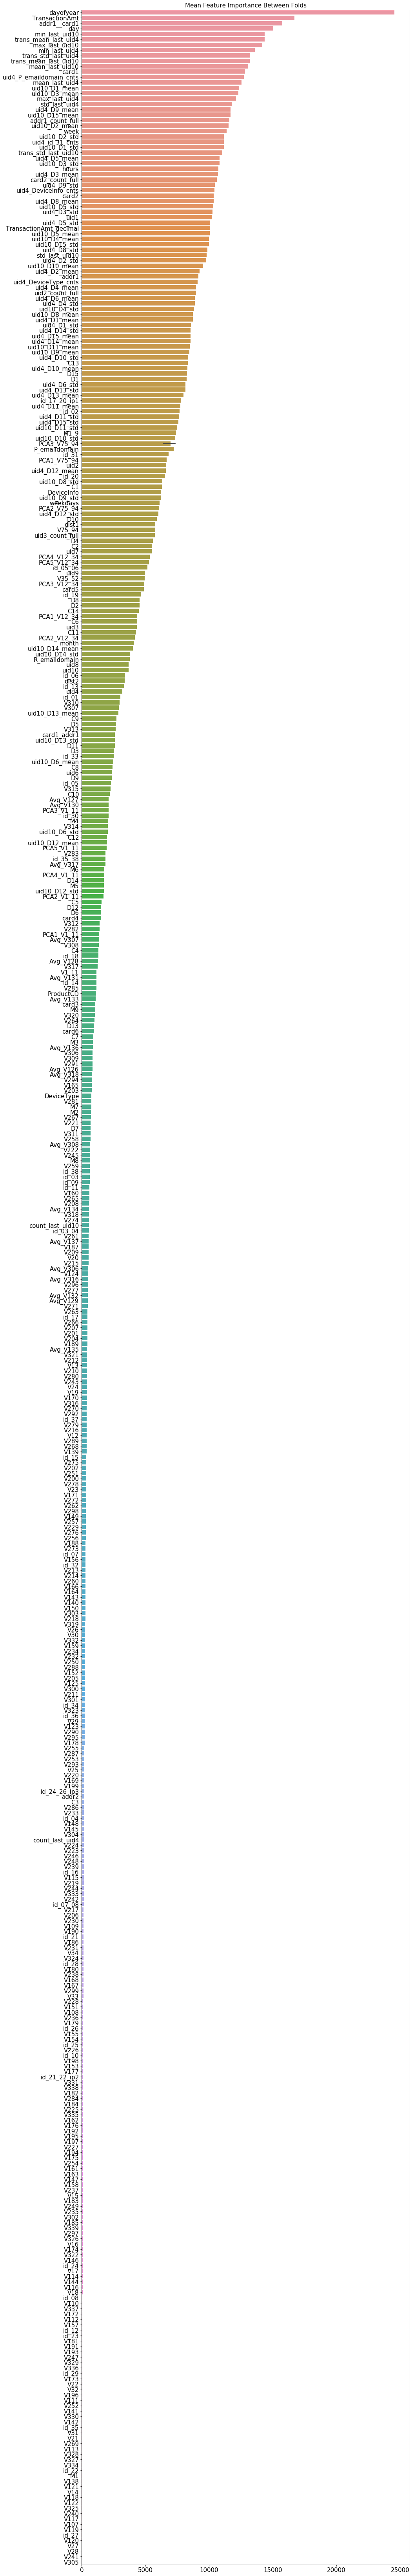

In [56]:
importance['Mean_Importance'] = importance.sum(axis=1) / splitcounts
importance.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(15, 120))
sns.barplot(x='Mean_Importance', y=importance.index, data=importance)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Mean Feature Importance Between Folds', size=15)

plt.show()